# Курсовая работа по курсу: "Теория вероятностей и математическая статистика"

### Провести дисперсионный анализ для определения того, есть ли различия среднего возраста среди убитых полицейскими в США: азиатов, белых, черных, латиносов, коренного населения и других.

In [279]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import pylab
import numpy as np

In [96]:
data = pd.read_csv("crimes.csv")

In [97]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [103]:
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [105]:
data.manner_of_death.value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

In [106]:
data.race.value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

### Визуально проверим на нормальность:

Text(0.5, 0, 'Age')

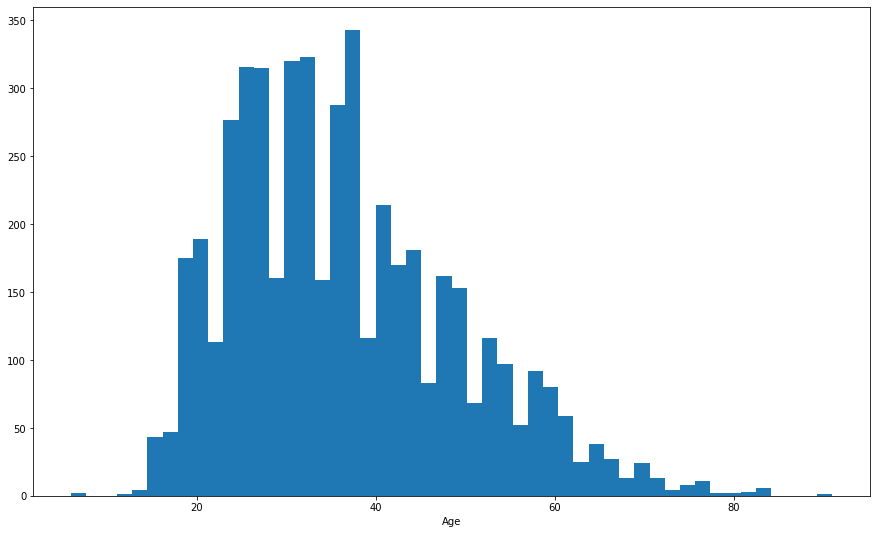

In [281]:
plt.figure(figsize=(15,9))
plt.hist(data.age, bins=50)
plt.xlabel("Age")

Видим гауссовидную форму данных, график имеет колоколообразную форму. 

### Для проверки распределения выборки данных воспользуемся еще графиком квантиль-квантиль или графиком QQ

In [282]:
p = np.array([data_male['age']])[0]

((array([-3.61821802, -3.38183343, -3.25149571, ...,  3.25149571,
          3.38183343,  3.61821802]),
  array([ 6.,  6., 13., ..., 84., 84., 91.])),
 (12.453596961737441, 36.52745308470228, 0.9799203486629053))

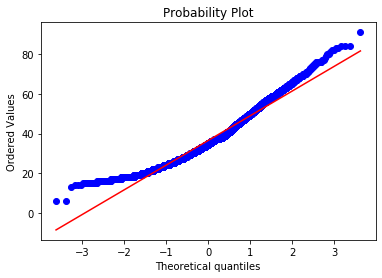

In [307]:
stats.probplot(p, dist='norm', plot=pylab)

### Данные имееют нормальное распределение, соответственно можем провести дисперсионный анализ данных!

Сделаем выборку из датасета по мужчинам:

In [165]:
data_male = data.loc[data.gender=='M']
data_male.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False,Sharp objects


In [121]:
data_male[['race', 'age']]

,race,age
0,Asian,53.0
1,White,47.0
2,Hispanic,23.0
3,White,32.0
4,Hispanic,39.0
...,...,...
4889,Black,62.0
4890,Black,27.0
4891,Black,23.0
4893,White,22.0


### Создаем группы по рассовой принадлежности: азиатов, белых, черных, латиносов, коренного населения и других.

In [285]:
d_asian = data_male.loc[(data_male['race']=='Asian'),'age']

In [286]:
d_black = data_male.loc[(data_male['race']=='Black'),'age']

In [287]:
d_hispanic = data_male.loc[(data_male['race']=='Hispanic'),'age']

In [288]:
d_native = data_male.loc[(data_male['race']=='Native'),'age']

In [289]:
d_other = data_male.loc[(data_male['race']=='Other'),'age']

In [290]:
d_white = data_male.loc[(data_male['race']=='White'),'age']

In [291]:
data_male['race'].value_counts()

White       2340
Black       1251
Hispanic     876
Asian         89
Native        73
Other         44
Name: race, dtype: int64

In [292]:
k = 6
n_a = d_asian.count()
n_b = d_black.count()
n_h = d_hispanic.count()
n_n = d_native.count()
n_o = d_other.count()
n_w = d_white.count()
n = n_a + n_b + n_h + n_n + n_o + n_w
n

4673

In [293]:
data_male.groupby(by='race')['age'].mean()

race
Asian       36.497032
Black       32.465092
Hispanic    33.747389
Native      31.768739
Other       33.229953
White       39.951613
Name: age, dtype: float64

In [294]:
n_a_mean = d_asian.mean()
n_b_mean = d_black.mean()
n_h_mean = d_hispanic.mean()
n_n_mean = d_native.mean()
n_o_mean = d_other.mean()
n_w_mean = d_white.mean()
print(f'Asian mean: {n_a_mean}, Black mean: {n_b_mean}, Hispanic mean: {n_h_mean},\nNative mean: {n_n_mean}, Other mean: {n_o_mean}, White mean: {n_w_mean}')

Asian mean: 36.49703215508698, Black mean: 32.46509219954667, Hispanic mean: 33.747388596725486,
Native mean: 31.76873877947083, Other mean: 33.229952975031146, White mean: 39.95161273027512


In [295]:
y_mean = (sum(d_asian)+sum(d_black)+sum(d_hispanic)+sum(d_native)+sum(d_other)+sum(d_white))/n
y_mean

36.52745308470226

Сумма квадратов отклонений наблюдений от общего среднего:

In [296]:
S = sum((d_asian-y_mean)**2)+sum((d_black-y_mean)**2)+sum((d_hispanic-y_mean)**2)+sum((d_native-y_mean)**2)+sum((d_other-y_mean)**2)+sum((d_white-y_mean)**2)
S

753681.6706951053

In [297]:
Sfact = (((n_a_mean-y_mean)**2)*n_a)+(((n_b_mean-y_mean)**2)*n_b)+(((n_h_mean-y_mean)**2)*n_h)+(((n_n_mean-y_mean)**2)*n_n)+(((n_o_mean-y_mean)**2)*n_o)+(((n_w_mean-y_mean)**2)*n_w)
Sfact

56983.18741969325

In [298]:
Sost = sum((d_asian-n_a_mean)**2)+sum((d_black-n_b_mean)**2)+sum((d_hispanic-n_h_mean)**2)+sum((d_native-n_n_mean)**2)+sum((d_other-n_o_mean)**2)+sum((d_white-n_w_mean)**2)
Sost

696698.483275412

In [299]:
Sfact+Sost # совпало с S до последней цифры

753681.6706951052

Вычисляем общую $\sigma^2$ (дисперсию):

In [300]:
S/(n-1)

161.31885074809617

Вычисляем факторную $\sigma^2$ (дисперсию):

In [301]:
Dfact = Sfact/(k-1)
Dfact

11396.63748393865

Вычисляем остаточную $\sigma^2$ (дисперсию):

In [302]:
Dost = Sost/(n-k)
Dost

149.28186913979258

In [303]:
Fn = Dfact/Dost
Fn

76.3430786981

Критерий F (Фишера):

Число степеней свободы числителя n-1=6-1=5, число степеней свободы знаменателя n-k=4673-6=4667 > 1000 (по таблице от 1000 и до $\infty$, критерий Фишера равен 2.21. Согласно таблице Распределение Фишера–Снедекора, при $\alpha$=0.05, F табличное = 2.21

Ft < Fn, следовательно, различие между группами статистически значимое!